# Lab 2: Data Loading, Cleaning, and Exploration

In this lab, we will cover the following topics:
1. Data loading and cleaning
2. Handling missing data
3. Feature engineering examples
4. Visualizations/data exploration

Each section includes basic implementation and questions for further exploration.

## 1. Data Loading and Cleaning

We will start by loading and cleaning a dataset. We will also explore different techniques for data cleaning.

In [ ]:
import functionals as f
import pandas as pd
import numpy as np

# Load the dataset
path_to_file = 'messy_data.csv'
data = pd.read_csv(path_to_file)

# Display dataset information
# data.head()
# data.info()
# data.describe()

#drop deck because it's missing too many rows
data.drop(["deck", "embarked"], axis=1, inplace=True)
# Run the simple model
#f.simple_model(data)

,survived,pclass,embark_town,sex,adult_male,who,wspd,lfwa,class,tprc,sibsp,age,alone,fare,parch
0,0,3.0,Southampton,male,True,man,22.0,44.0,Third,23.7500,1.0,22.0,False,7.2500,0.0
1,1,1.0,Cherbourg,female,False,woman,38.0,76.0,First,215.8499,1.0,38.0,False,71.2833,0.0
2,1,3.0,Southampton,female,False,woman,26.0,52.0,Third,25.7750,0.0,26.0,True,7.9250,0.0
3,1,NaN,Southampton,female,False,woman,45.0,70.0,First,161.3000,NaN,35.0,False,53.1000,0.0
4,0,3.0,Southampton,male,True,man,235.0,70.0,Third,26.1500,0.0,35.0,True,8.0500,NaN


## Data Cleaning

We will clean the dataset by removing duplicates, fixing inconsistent entries and removing outliers.

In [32]:
# Remove duplicates
data_no_duplicates = data.copy().drop_duplicates()

# Fix inconsistent entries
data_format_fixed = data_no_duplicates.copy()
data_format_fixed['sex'] = data_format_fixed['sex'].apply(lambda x: 'female' if 'F' in x or 'f' in x else 'male')

# Check for outliers - if they exist, remove them
# <insert code here>

# Dataset with no duplicates, fixed format, missing values and outlier removed (if they exist)
# <insert code here>


### Questions for Exploration

1. How does the following affect model performance?
    * removing duplicates
    * fixing inconsistencies  
2. What other inconsistencies can you find and fix in the dataset?
3. How does the choice of dataset affect the data cleaning process?

## 2. Handling Missing Data

We will handle missing data by using different techniques such as imputation and deletion. We will also explore the impact of these techniques on the dataset.

In [ ]:
# Identify missing values
missing_data = data.isnull().sum()
print(missing_data)

# Impute missing values
numerical_col_name = []
categorical_col_name = []
data['age'].fillna(data['age'].mean(), inplace=True)
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Display the dataset after handling missing data
data.head()


survived         0
pclass         107
embark_town      3
sex              0
adult_male       0
who              0
wspd           229
lfwa           229
class            0
tprc             0
sibsp          114
age            329
alone            0
fare           122
parch          116
dtype: int64
Accuracy: 0.8256880733944955


C:\Users\mayac\AppData\Local\Temp\ipykernel_17840\1535119633.py:8: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['age'].fillna(data['age'].mean(), inplace=True)
C:\Users\mayac\AppData\Local\Temp\ipykernel_17840\1535119633.py:9: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assign

### Questions for Exploration

1. How does the following affect model performance:
    * imputation 
    * dropping rows with missing values
2. What happens to the model performance if you use different imputation techniques (e.g., median, mode)?
3. How does the choice of dataset affect the handling of missing data?

## 3. Feature Engineering Examples

Next, we will create new features from the existing ones. We will also explore different techniques for feature engineering.

In [34]:
# Create new features
data_new_features = data.copy()
data_new_features['family_size'] = data_new_features['sibsp'] + data_new_features['parch'] + 1
data_new_features['is_alone'] = (data_new_features['family_size'] == 1).astype(int)

# Any other features you can think of?

# Scale the numerical features
# <insert code here>

### Questions for Exploration

1. How do the new features affect model performance?
2. What other features can you create from the existing ones?
3. How does feature scaling (e.g., standardization, normalization) affect model performance? (Keep in mind that the data should be scaled **after** data splitting; this will require modifying the simple_model method in functionals.)

## 4. Visualizations/Data Exploration

We will visualize and explore the dataset using different techniques. We will also explore the impact of these visualizations on data interpretation.

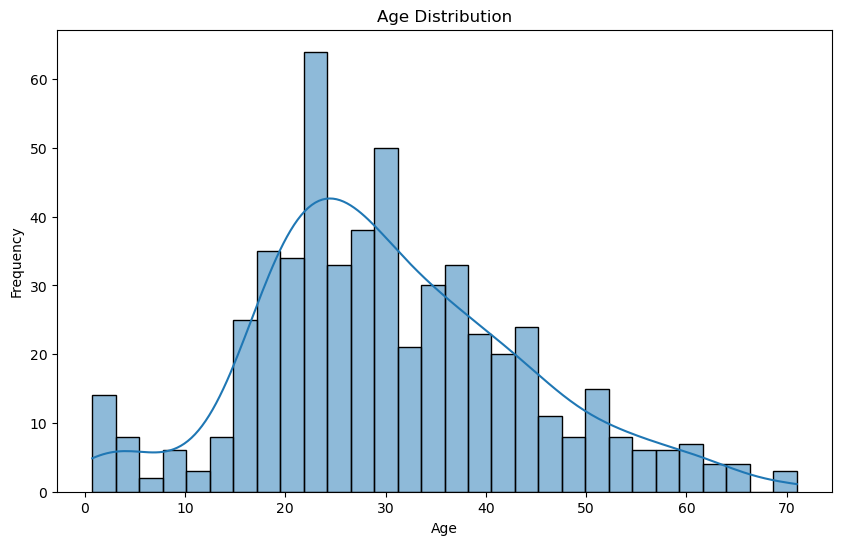

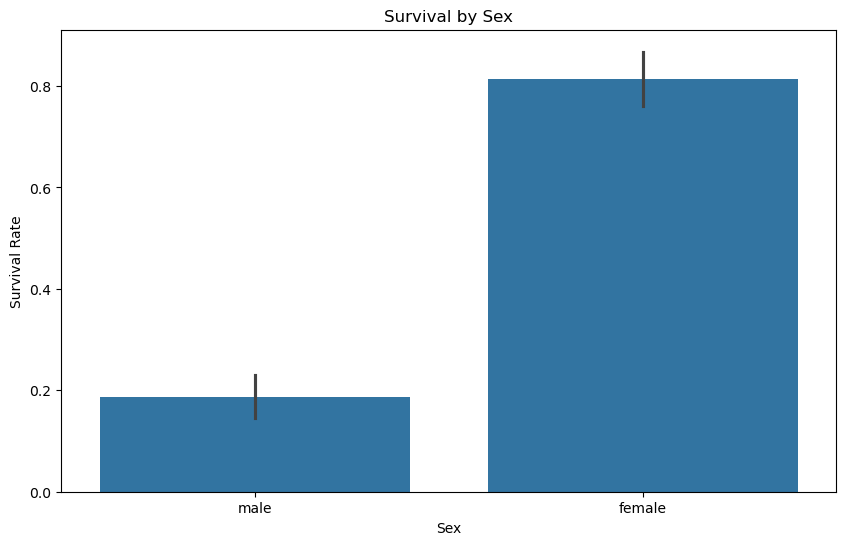

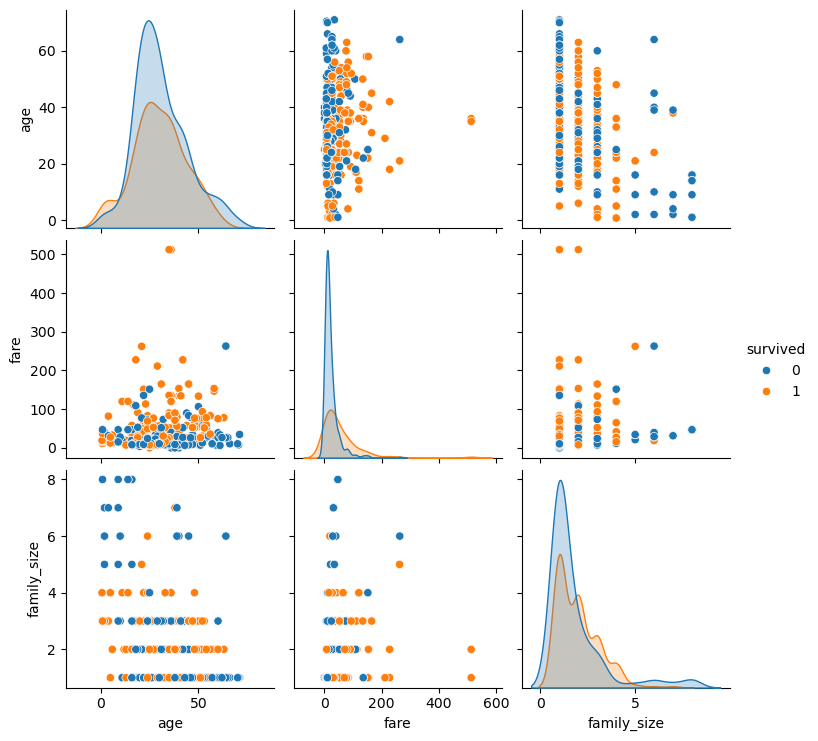

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data_new_features['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of survival by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=data_new_features)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Pair plot of numerical features
sns.pairplot(data_new_features[['age', 'fare', 'family_size', 'survived']], hue='survived')
plt.show()
#test for new push


### Questions for Exploration

1. How do the visualizations help in understanding the dataset?
2. What other visualizations can you create to explore the dataset?
3. How does the choice of visualization technique affect the interpretation of the data?

## Extensions

Explore other data preprocessing techniques such as:
- Encoding categorical variables (e.g., one-hot encoding, label encoding) - i.e., if you modify the simple_model method to only include numerical features, omitting the categorical variables
- Feature selection techniques (i.e., assessing inter-feature correlation and removing )

Compare their impact on the dataset and the performance of downstream machine learning models. 
Can you identify any sources of bias in the dataset?